### K means Clustering Implementation

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 1000,centers = 3, n_features = 2)

In [3]:
X

array([[ 6.92720781,  7.90953821],
       [ 0.39887139, -0.01921654],
       [-3.89314417, -8.10006845],
       ...,
       [ 9.68754344,  5.60149083],
       [ 0.67123491, -0.69587301],
       [-3.81261808, -8.01924262]])

In [4]:
y

array([0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0,
       1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0,

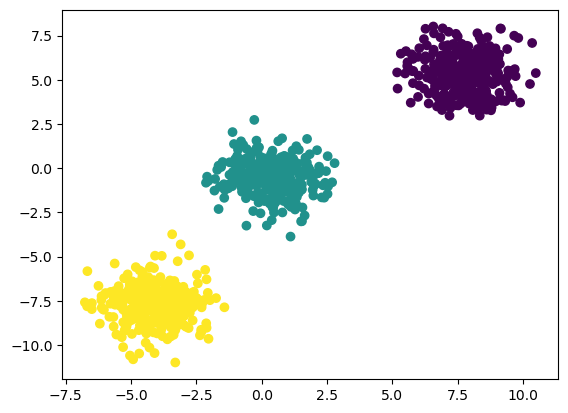

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
## Standardization ---> feature Scaling Technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.33,random_state = 42)

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled

array([[-0.83715201, -1.24369921],
       [-1.09556967, -1.26978833],
       [-0.4385912 ,  0.18357525],
       ...,
       [-1.03607132, -1.20771298],
       [-1.53308505, -1.04449026],
       [-0.84144173, -1.30082271]])

In [13]:
X_test_scaled

array([[-1.07418705e+00, -1.24014904e+00],
       [ 1.21926325e+00,  1.12642330e+00],
       [ 1.07334589e+00,  1.00877419e+00],
       [ 1.29145013e+00,  1.38843844e+00],
       [-2.00209502e-01, -2.43356895e-01],
       [-2.83006336e-01, -1.24757745e-01],
       [-9.52281761e-01, -1.17559930e+00],
       [-3.78338906e-01,  2.03385026e-01],
       [ 1.10529097e+00,  1.26394858e+00],
       [-1.25595832e+00, -1.35572438e+00],
       [-1.05391323e+00, -1.32145483e+00],
       [-3.88763626e-01, -5.66261835e-02],
       [-1.48709110e+00, -1.13653504e+00],
       [ 1.30711592e+00,  1.24997760e+00],
       [-1.30775361e+00, -1.10815677e+00],
       [-1.75771787e-01,  1.21945422e-01],
       [ 1.50988763e+00,  8.36035992e-01],
       [-1.31304574e-02, -1.37872791e-01],
       [ 1.04446126e+00,  1.13400663e+00],
       [ 1.24582819e+00,  9.57581922e-01],
       [-1.52250496e+00, -1.42978014e+00],
       [ 1.12773507e+00,  1.14810992e+00],
       [-3.43066151e-01,  3.23172177e-01],
       [-8.

In [18]:
from sklearn.cluster import KMeans 
## Elbow Method to select K Values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = "k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)


In [19]:
wcss

[1339.9999999999998,
 323.84559537928726,
 47.87139412395193,
 42.46560979893138,
 36.67029523514233,
 31.624117095869636,
 27.553798969828094,
 24.59500424343447,
 21.208455604244083,
 20.22470229452425]

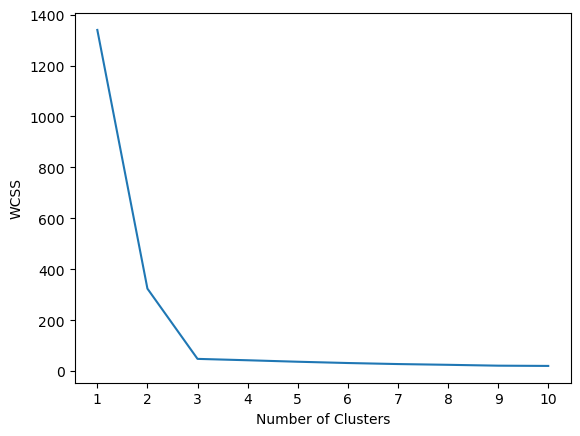

In [20]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 3,init = "k-means++")
kmeans.fit_predict(X_train_scaled)
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0,
       2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1,
       1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0,
       1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1,
       2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0,
       2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2,
       0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0,
       0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1,
       0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0,

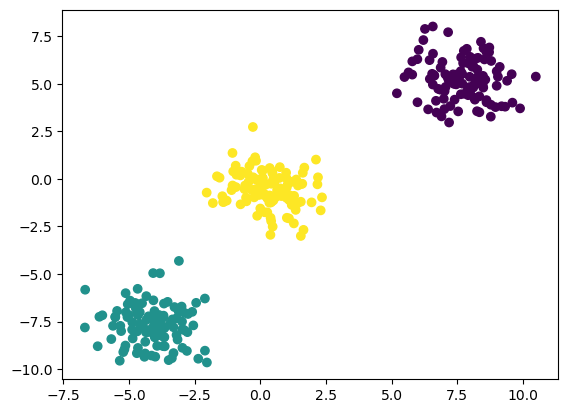

In [23]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

#### Validating the K value

1. KneeLocator
2. Silhoutee Scoring

In [25]:
## KneeLocator
##!pip install kneed

In [29]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve = "convex",direction = "decreasing")
kl.elbow

3

In [32]:
## Silhoutee Scoring
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k,init = "k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [33]:
silhouette_coefficients

[0.6860479542625391,
 0.7953356692373077,
 0.6159485952128575,
 0.647831548333762,
 0.32401119949562923,
 0.4877680725462145,
 0.30990991658269634,
 0.3440340774670524,
 0.32618459898174407]

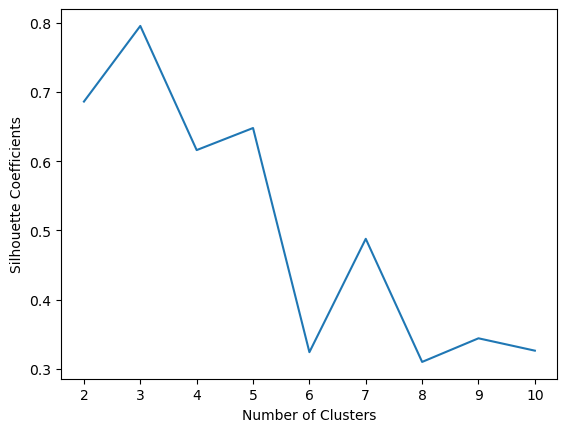

In [36]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()